[  0.         696.44670051]


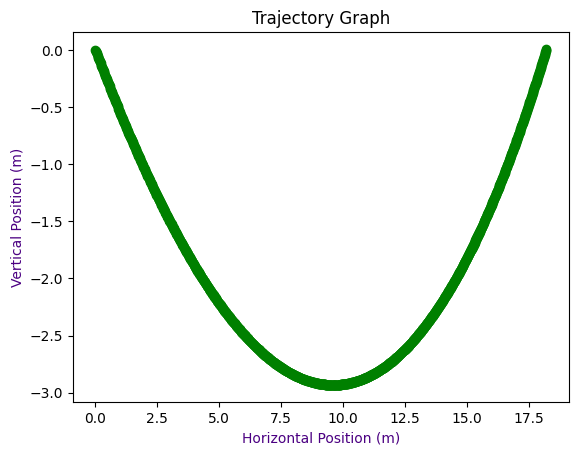

Lowest height was -2.932292973705283 meters
Time at lowest height was 6.079999999999915 seconds
X position at lowest height was 9.59360060650128 meters
Velocity at lowest height was [ 1.44829601e+00 -1.13154350e-03] meters / second


In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# constants
m = 70 # average mass of a person (https://en.wikipedia.org/wiki/Human_body_weight)
g = np.array([0, -9.8]) # m / s / s

# 20 meters per second at 30 below the horizontal
# vx = 20 * cos(30), vy = 20 * sin(30) 
v = np.array([2 * np.cos(30 * np.pi / 180), 2 * np.sin(30 * np.pi / 180) * -1])

pos = np.array([0, 0])

time = 0 # seconds
dt = 0.01 # seconds

roe = 1000 # g/m^3, density of water at 40 f (https://www.usgs.gov/special-topics/water-science-school/science/water-density)
Cd = 1.0 # average value for competitve swimmers (https://swimmingtechnology.com/measurement-of-the-active-drag-coefficient/)
A = (m + 4) / 30 # from https://hypertextbook.com/facts/2001/IgorFridman.shtml, from https://bionumbers.hms.harvard.edu/bionumber.aspx?s=y&id=100578&ver=1

F_drag_without_v = 0.5 * roe * Cd * A # Newtons

# Bouyancy = fluid density * g * fluid volume

# https://www.quora.com/What-is-the-average-density-of-human-body
# best number I have, since it can't be "the same as water" - then the diver would simply drown
d = 0.985 # g / m^3

volume = m / d # volume, m^3

F_b = np.array([0, 9.8 * roe * volume]) # bouyancy = g * water density * volume of displaced water
print(F_b)

# lists
hlist = [pos[1]] # meters
xlist = [pos[0]] # meters
vlist = [v] # meters / second
tlist = [time] # seconds

while pos[1] <= 0:
    v_mag = np.linalg.norm(v) # normalize velocity
    v_unit = v / v_mag # get the unit vector for velocity

    F_drag = v_unit * F_drag_without_v * (v_mag ** 2) * -1 # Newtons, multiply by -1 bc in opposite direction 
    F_net = (m * g) + F_b + F_drag # net force is Fg + Fb + Fd


    #print(f"{pos}, {v}, {F_drag}, {F_net}")

    a = F_net / m # F = ma, so a = F/m
    v = v + a * dt # update velocity
    pos = pos + v * dt # update position


    time += dt # update time

    # update lists
    hlist.append(pos[1])
    xlist.append(pos[0])
    tlist.append(time)
    vlist.append(v)

# graphs!
plt.scatter(xlist, hlist, color="green") # just a scatter plot
plt.xlabel("Horizontal Position (m)", color="indigo") # label the x axis
plt.ylabel("Vertical Position (m)", color="indigo") # label the y axis
plt.title("Trajectory Graph") # title

plt.show() # show plot

# get deepest point (I'd like to know)

lowest_h = min(hlist)
lowest_h_idx = hlist.index(lowest_h)
lowest_t = tlist[lowest_h_idx]
lowest_x = xlist[lowest_h_idx]
lowest_v = vlist[lowest_h_idx]

print(f"Lowest height was {lowest_h} meters")
print(f"Time at lowest height was {lowest_t} seconds")
print(f"X position at lowest height was {lowest_x} meters")
print(f"Velocity at lowest height was {lowest_v} meters / second")


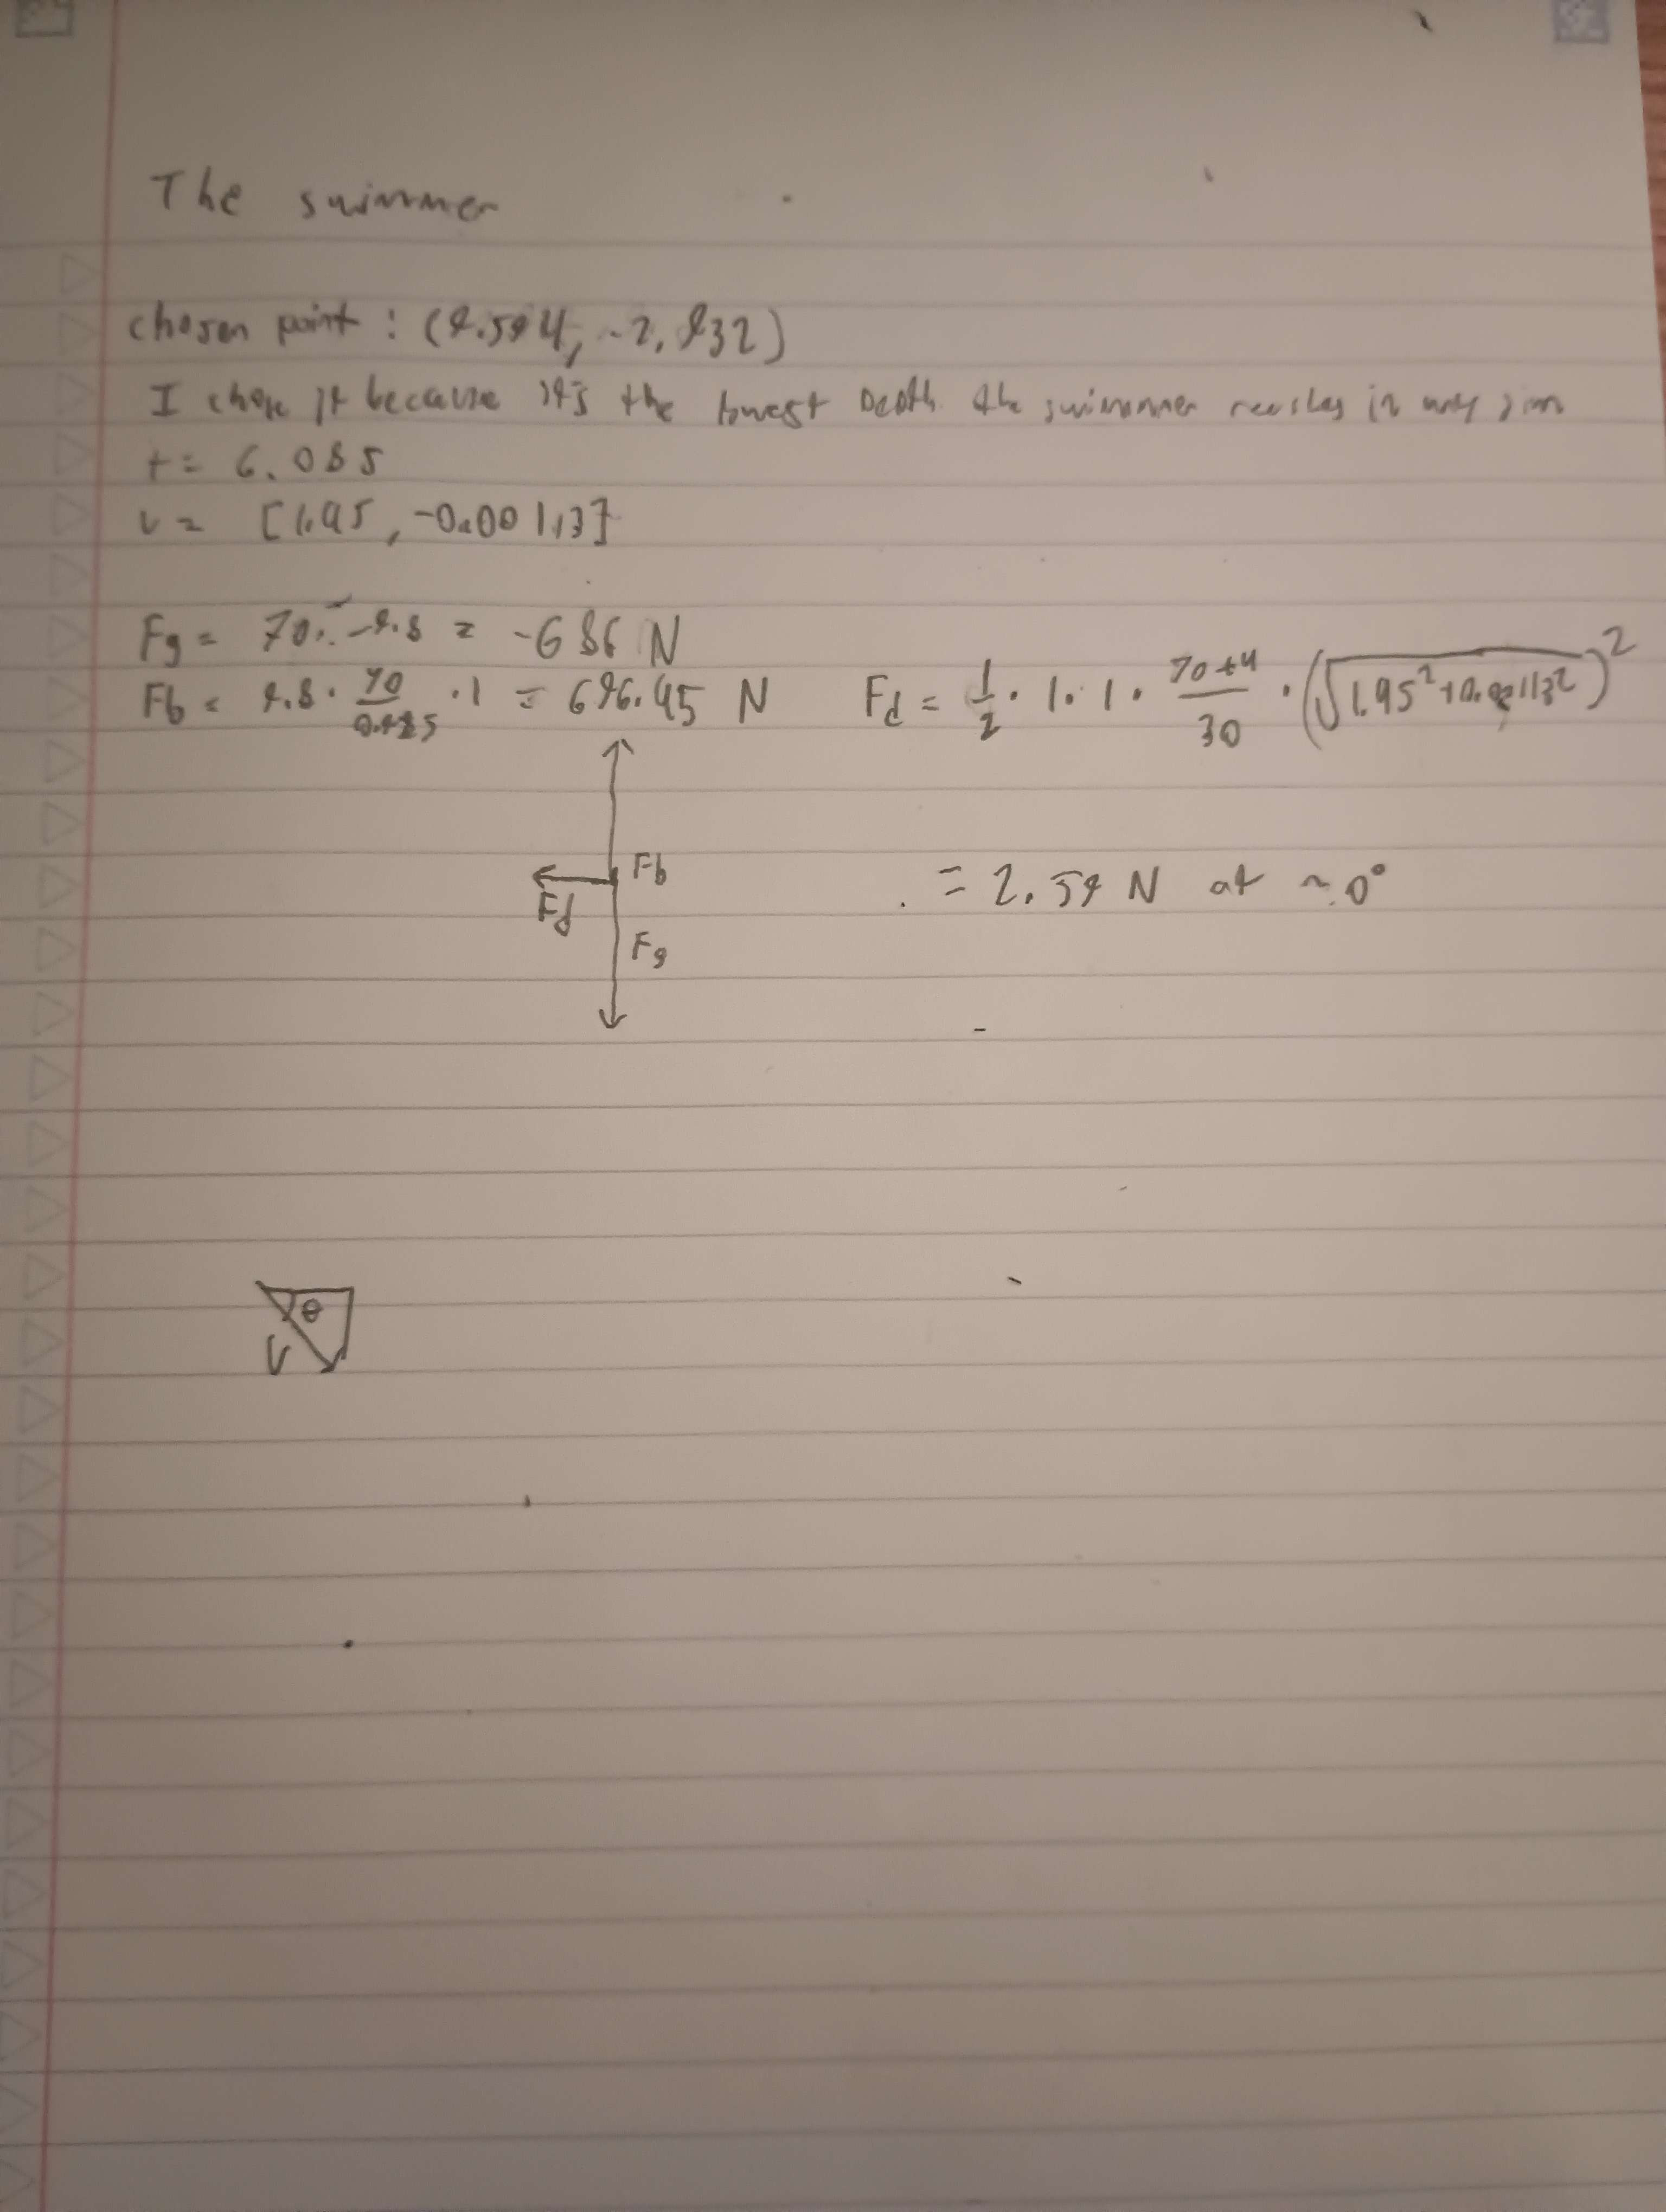